# Import Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col=0)

/var/folders/70/w17hvdpd0hl783xb5m_jdw3m0000gn/T/ipykernel_72610/1214210424.py:1: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
/var/folders/70/w17hvdpd0hl783xb5m_jdw3m0000gn/T/ipykernel_72610/1214210424.py:2: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col=0)


In [3]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
163466,58544248,62385031,35000,35000,35000.0,36 months,9.99,1129.19,B,B3,...,0,0,0,1,0,0,0,0,0,0
141710,60277044,64253819,18000,18000,18000.0,60 months,14.65,424.92,C,C5,...,0,0,0,1,0,0,0,0,0,0
75700,63569148,67958896,30000,30000,29750.0,36 months,11.49,989.14,B,B5,...,0,0,0,1,0,0,0,0,0,0
102660,62336456,66533198,2000,2000,2000.0,36 months,13.99,68.35,C,C4,...,0,1,0,1,0,0,0,0,0,0
107838,61318661,65437387,12000,12000,11975.0,60 months,16.99,298.17,D,D3,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
163466,1
141710,1
75700,1
102660,1
107838,1


In [5]:
loan_data_inputs_train.shape

(336875, 306)

In [6]:
loan_data_targets_train.shape

(336875, 1)

In [7]:
loan_data_targets_test.shape

(84219, 1)

In [8]:
loan_data_targets_test.shape

(84219, 1)

# Selecting the features

In [9]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,[ 'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ID_IA_NV_SD_HI',
'addr_state:OK_WY_AK',
'addr_state:UT_AL_NY_FL_VA',
'addr_state:MS_MN_CA_LA',
'addr_state:WI_MD_NC',
'addr_state:AZ_IN_OH_TX_NM',
'addr_state:MI_NJ_PA_KY',
'addr_state:RI_WA_TN_OR_MO_DE',
'addr_state:MA_KS_GA_WV_AR',
'addr_state:CT_SC_CO_IL_MT_VT',
'addr_state:DC_NH_NE_ND_ME',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:wed__edu__ren_en__sm_b__mov',
'purpose:med__house__maj_pur__oth__vac',
 'purpose:debt_consolidation',
'purpose:car__home_impr',
 'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5',
'emp_length:6-7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'mths_since_issue_date:36-38',
'mths_since_issue_date:39-41',
'mths_since_issue_date:42-44',
'mths_since_issue_date:>=45',
'int_rate:<10.054',
'int_rate:10.054-14.788',
'int_rate:14.788-18.575',
'int_rate:18.575-24.256',
'int_rate:>24.256',
'mths_since_earliest_cr_line:<178',
'mths_since_earliest_cr_line:179-220',
'mths_since_earliest_cr_line:221-315',
'mths_since_earliest_cr_line:316-399',
'mths_since_earliest_cr_line:400-483',
'mths_since_earliest_cr_line:>483',
'delinq_2yrs:0',
'delinq_2yrs:1-5',
'delinq_2yrs:>=6',
'inq_last_6mths:0',
'inq_last_6mths:1-3',
'inq_last_6mths:>3',
'open_acc:<=2',
'open_acc:3-12',
'open_acc:13-16',
'open_acc:17-21',
'open_acc:22-28',
'open_acc:>=29',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86', ]]

In [10]:
#Now remove 1 dummy for each original variable, otherwise 'dummy variable trap'
#WHile preprocessing, determined 1 reference category per variable, will remove this
#Whatever dummy is not included in the training process will be the benchmark

In [11]:
ref_categories = ['grade:G',
'home_ownership:RENT_ANY',
'addr_state:ID_IA_NV_SD_HI',
'verification_status:Verified',
'purpose:wed__edu__ren_en__sm_b__mov',
'initial_list_status:f',
'term:36',
'emp_length:1',
'mths_since_issue_date:>=45',
'int_rate:>24.256',
'mths_since_earliest_cr_line:<178',
'delinq_2yrs:>=6',
'inq_last_6mths:>3',
'open_acc:<=2',
'pub_rec:>=5',
'total_acc:<=27',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',
'dti:>35',
'mths_since_last_record:0-2',]

In [12]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis=1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_WY_AK,addr_state:UT_AL_NY_FL_VA,...,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
163466,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
141710,0,0,1,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
75700,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
102660,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
107838,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# PD model estimation

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
reg = LogisticRegression()

In [15]:
pd.options.display.max_rows = None

In [16]:
#We estimate the model by fitting the inputs and the targets
reg.fit(inputs_train, loan_data_targets_train)
#This command alone will estimate our PD model and will store the results in the reg object

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
reg.intercept_
#to get the coefficients of our PD model

array([0.30252953])

In [18]:
reg.coef_
#gives us the coefficients of in the order of the dependent variables in the input dataframe

array([[ 1.65294216e+00,  8.70868877e-01,  4.68122048e-01,
         9.52678118e-02, -2.39850637e-02, -2.57692185e-01,
         7.49694469e-02,  2.25308051e-01, -1.41135018e-01,
        -1.63529603e-02,  5.13628086e-02,  6.71385614e-02,
         1.03826146e-01,  1.63311125e-01,  2.71131345e-01,
         2.62354407e-01,  4.17273323e-01,  6.77326227e-01,
         5.53837424e-02,  1.13494276e-01,  1.57713688e-01,
         2.04750101e-01,  1.32779876e-01,  2.66215104e-01,
         1.14144054e-02,  3.03548474e-01, -2.06922552e-02,
         1.46443374e-01,  1.26734129e-01,  6.99667462e-02,
         2.65638739e-01,  1.49457870e-01,  2.27125247e-01,
         3.38613323e+00,  1.41392491e+00,  5.39618962e-01,
         1.41313479e+00,  1.09252604e+00,  8.27193729e-01,
         5.24791487e-01,  9.81968071e-02,  1.88837954e-01,
         1.96023539e-01,  2.59028027e-01,  1.84311100e-01,
         1.05984408e-01, -9.23401149e-02,  2.73334206e-01,
         6.48960084e-02, -3.67600962e-02,  2.08623341e-0

In [19]:
feature_name = inputs_train.columns.values

In [20]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,0.302530
1,grade:A,1.652942
2,grade:B,0.870869
3,grade:C,0.468122
4,grade:D,0.095268
5,grade:E,-0.023985
6,grade:F,-0.257692
7,home_ownership:OWN,0.074969
8,home_ownership:MORTGAGE,0.225308
9,addr_state:OK_WY_AK,-0.141135


## Logistic regression with p-values

In [21]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)

        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [23]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.302530
1,grade:A,1.652942
2,grade:B,0.870869
3,grade:C,0.468122
4,grade:D,0.095268
5,grade:E,-0.023985
6,grade:F,-0.257692
7,home_ownership:OWN,0.074969
8,home_ownership:MORTGAGE,0.225308
9,addr_state:OK_WY_AK,-0.141135


In [25]:
p_values = reg.p_values

In [26]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [27]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing

In [28]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.302530,NaN
1,grade:A,1.652942,8.190328e-15
2,grade:B,0.870869,6.314857e-06
3,grade:C,0.468122,1.121175e-02
4,grade:D,0.095268,5.229326e-01
5,grade:E,-0.023985,8.594504e-01
6,grade:F,-0.257692,2.408250e-02
7,home_ownership:OWN,0.074969,8.836096e-02
8,home_ownership:MORTGAGE,0.225308,1.115559e-13
9,addr_state:OK_WY_AK,-0.141135,2.558933e-01


In [29]:
summary_table.to_clipboard(excel=True, sep='\t')
#copy to Excel for better view & selection

In [30]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:A',
                                                           'grade:B',
                                                           'grade:C',
                                                           'grade:D',
                                                           'grade:E',
                                                           'grade:F',
                                                           'grade:G',
                                                           'home_ownership:RENT_ANY',
                                                           'home_ownership:OWN',
                                                           'home_ownership:MORTGAGE',
                                                           'addr_state:ID_IA_NV_SD_HI',
                                                           'addr_state:OK_WY_AK',
                                                           'addr_state:UT_AL_NY_FL_VA',
                                                           'addr_state:MS_MN_CA_LA',
                                                           'addr_state:WI_MD_NC',
                                                           'addr_state:AZ_IN_OH_TX_NM',
                                                           'addr_state:MI_NJ_PA_KY',
                                                           'addr_state:RI_WA_TN_OR_MO_DE',
                                                           'addr_state:MA_KS_GA_WV_AR',
                                                           'addr_state:CT_SC_CO_IL_MT_VT',
                                                           'addr_state:DC_NH_NE_ND_ME',
                                                           'verification_status:Verified',
                                                           'verification_status:Source Verified',
                                                           'verification_status:Not Verified',
                                                           'purpose:wed__edu__ren_en__sm_b__mov',
                                                           'purpose:med__house__maj_pur__oth__vac',
                                                           'purpose:debt_consolidation',
                                                           'purpose:car__home_impr',
                                                           'purpose:credit_card',

                                                           'term:36',
                                                           'term:60',
                                                           'emp_length:0',
                                                           'emp_length:1',
                                                           'emp_length:2-4',
                                                           'emp_length:5',
                                                           'emp_length:6-7',
                                                           'emp_length:8',
                                                           'emp_length:9',
                                                           'emp_length:10',

                                                           'int_rate:<10.054',
                                                           'int_rate:10.054-14.788',
                                                           'int_rate:14.788-18.575',
                                                           'int_rate:18.575-24.256',
                                                           'int_rate:>24.256',
                                                           'mths_since_earliest_cr_line:<178',
                                                           'mths_since_earliest_cr_line:179-220',
                                                           'mths_since_earliest_cr_line:221-315',
                                                           'mths_since_earliest_cr_line:316-399',
                                                           'mths_since_earliest_cr_line:400-483',
                                                           'mths_since_earliest_cr_line:>483',

                                                           'inq_last_6mths:0',
                                                           'inq_last_6mths:1-3',
                                                           'inq_last_6mths:>3',



                                                           'total_acc:<=27',
                                                           'total_acc:28-51',
                                                           'total_acc:>=52',


                                                           'dti:<=1.4',
                                                           'dti:1.4-3.5',
                                                           'dti:3.5-7.7',
                                                           'dti:7.7-10.5',
                                                           'dti:10.5-16.1',
                                                           'dti:16.1-20.3',
                                                           'dti:20.3-21.7',
                                                           'dti:21.7-22.4',
                                                           'dti:22.4-35',
                                                           'dti:>35',


                                                            ]]

In [31]:
ref_categories = ['grade:G',
                  'home_ownership:RENT_ANY',
                  'addr_state:ID_IA_NV_SD_HI',
                  'verification_status:Verified',
                  'purpose:wed__edu__ren_en__sm_b__mov',

                  'term:36',
                  'emp_length:1',

                  'int_rate:>24.256',
                  'mths_since_earliest_cr_line:<178',

                  'inq_last_6mths:>3',


                  'total_acc:<=27',


                  'dti:>35',

                   ]

In [32]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_WY_AK,addr_state:UT_AL_NY_FL_VA,...,total_acc:>=52,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
163466,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
141710,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
75700,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
102660,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
107838,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
feature_name = inputs_train.columns.values

In [35]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.333377
1,grade:A,1.571347
2,grade:B,0.779204
3,grade:C,0.355747
4,grade:D,0.292726
5,grade:E,0.199724
6,grade:F,-0.019478
7,home_ownership:OWN,0.125585
8,home_ownership:MORTGAGE,0.242454
9,addr_state:OK_WY_AK,-0.106533


In [36]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,1.333377,NaN
1,grade:A,1.571347,3.040944e-13
2,grade:B,0.779204,6.979817e-05
3,grade:C,0.355747,5.825124e-02
4,grade:D,0.292726,3.249494e-02
5,grade:E,0.199724,1.064278e-01
6,grade:F,-0.019478,8.505454e-01
7,home_ownership:OWN,0.125585,3.797913e-03
8,home_ownership:MORTGAGE,0.242454,1.627246e-16
9,addr_state:OK_WY_AK,-0.106533,3.695636e-01


In [37]:
summary_table.to_clipboard(excel=True, sep='\t')

# PD model validation

## Data not in the sample (test data)

In [38]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['grade:A',
                                                           'grade:B',
                                                           'grade:C',
                                                           'grade:D',
                                                           'grade:E',
                                                           'grade:F',
                                                           'grade:G',
                                                           'home_ownership:RENT_ANY',
                                                           'home_ownership:OWN',
                                                           'home_ownership:MORTGAGE',
                                                           'addr_state:ID_IA_NV_SD_HI',
                                                           'addr_state:OK_WY_AK',
                                                           'addr_state:UT_AL_NY_FL_VA',
                                                           'addr_state:MS_MN_CA_LA',
                                                           'addr_state:WI_MD_NC',
                                                           'addr_state:AZ_IN_OH_TX_NM',
                                                           'addr_state:MI_NJ_PA_KY',
                                                           'addr_state:RI_WA_TN_OR_MO_DE',
                                                           'addr_state:MA_KS_GA_WV_AR',
                                                           'addr_state:CT_SC_CO_IL_MT_VT',
                                                           'addr_state:DC_NH_NE_ND_ME',
                                                           'verification_status:Verified',
                                                           'verification_status:Source Verified',
                                                           'verification_status:Not Verified',
                                                           'purpose:wed__edu__ren_en__sm_b__mov',
                                                           'purpose:med__house__maj_pur__oth__vac',
                                                           'purpose:debt_consolidation',
                                                           'purpose:car__home_impr',
                                                           'purpose:credit_card',

                                                           'term:36',
                                                           'term:60',
                                                           'emp_length:0',
                                                           'emp_length:1',
                                                           'emp_length:2-4',
                                                           'emp_length:5',
                                                           'emp_length:6-7',
                                                           'emp_length:8',
                                                           'emp_length:9',
                                                           'emp_length:10',

                                                           'int_rate:<10.054',
                                                           'int_rate:10.054-14.788',
                                                           'int_rate:14.788-18.575',
                                                           'int_rate:18.575-24.256',
                                                           'int_rate:>24.256',
                                                           'mths_since_earliest_cr_line:<178',
                                                           'mths_since_earliest_cr_line:179-220',
                                                           'mths_since_earliest_cr_line:221-315',
                                                           'mths_since_earliest_cr_line:316-399',
                                                           'mths_since_earliest_cr_line:400-483',
                                                           'mths_since_earliest_cr_line:>483',

                                                           'inq_last_6mths:0',
                                                           'inq_last_6mths:1-3',
                                                           'inq_last_6mths:>3',

                                                           'total_acc:<=27',
                                                           'total_acc:28-51',
                                                           'total_acc:>=52',


                                                           'dti:<=1.4',
                                                           'dti:1.4-3.5',
                                                           'dti:3.5-7.7',
                                                           'dti:7.7-10.5',
                                                           'dti:10.5-16.1',
                                                           'dti:16.1-20.3',
                                                           'dti:20.3-21.7',
                                                           'dti:21.7-22.4',
                                                           'dti:22.4-35',
                                                           'dti:>35',

                                                           ]]

In [39]:
ref_categories = ['grade:G',
                  'home_ownership:RENT_ANY',
                  'addr_state:ID_IA_NV_SD_HI',
                  'verification_status:Verified',
                  'purpose:wed__edu__ren_en__sm_b__mov',

                  'term:36',
                  'emp_length:1',

                  'int_rate:>24.256',
                  'mths_since_earliest_cr_line:<178',

                  'inq_last_6mths:>3',

                  'total_acc:<=27',


                  'dti:>35',

                  ]

In [40]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_WY_AK,addr_state:UT_AL_NY_FL_VA,...,total_acc:>=52,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
337617,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
331856,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
266156,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
315997,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
328301,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
y_hat_test = reg2.model.predict(inputs_test)
#takes the model which is stored in the reg2 object and applies the predict method

#logistic_regression_model.predict(df with independent variables)
#1) multiplies the values of the variables by the model coefficients; this yields the log of odds of being good;
#2) an exponent is raised to the power the log of odds; this yields the odds of being good and the estimated probability of being good;
#3) the estimated probabilities are categorized into being good or bad by applying a cut-off.

#The default cut-off is 0.5 or 50%. Estimated probability <=50%: Bad,0. Estimated probability >50%: Good,1

In [42]:
y_hat_test
#y hat test is an array of zeros and ones one for each of the observations in the input test data

array([1, 1, 1, ..., 1, 1, 1], shape=(84219,))

In [43]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba
#array of arrays. for each array, the first element is the PD (bad), the second element is the probability of non-default 1-PD (good)

array([[0.01108783, 0.98891217],
       [0.01295954, 0.98704046],
       [0.00925959, 0.99074041],
       ...,
       [0.00344475, 0.99655525],
       [0.00477566, 0.99522434],
       [0.00226229, 0.99773771]], shape=(84219, 2))

In [44]:
y_hat_test_proba[:][:,1]
#choose all arrays and then from each array only the second element (with an index of 1)

array([0.98891217, 0.98704046, 0.99074041, ..., 0.99655525, 0.99522434,
       0.99773771], shape=(84219,))

In [45]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [46]:
y_hat_test_proba

array([0.98891217, 0.98704046, 0.99074041, ..., 0.99655525, 0.99522434,
       0.99773771], shape=(84219,))

In [47]:
loan_data_targets_test_temp = loan_data_targets_test

In [48]:
loan_data_targets_test_temp.reset_index(drop=True, inplace=True)

In [49]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [50]:
df_actual_predicted_probs.shape

(84219, 2)

In [51]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [52]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [53]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
337617,1,0.988912
331856,1,0.987040
266156,1,0.990740
315997,1,0.996785
328301,1,0.973961


## Accuracy and AUC

In [54]:
tr = 0.8 #the cut-off threshold
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [55]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,1,1548
1,0,82670


In [56]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,

Predicted,0,1
Actual,,
0,0.000012,0.018381
1,0.000000,0.981607


In [57]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

np.float64(0.9816193495529513)

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
#we get 3 arrays
#first the false positive rate
#second the true positive rate
#finally the thresholds

(array([0.        , 0.        , 0.        , ..., 0.99935442, 0.99935442,
        1.        ], shape=(14939,)),
 array([0.00000000e+00, 1.20962864e-05, 7.25777186e-05, ...,
        9.99975807e-01, 1.00000000e+00, 1.00000000e+00], shape=(14939,)),
 array([       inf, 0.99937358, 0.9990953 , ..., 0.8128686 , 0.80661191,
        0.7975102 ], shape=(14939,)))

In [60]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Text(0.5, 1.0, 'ROC curve')

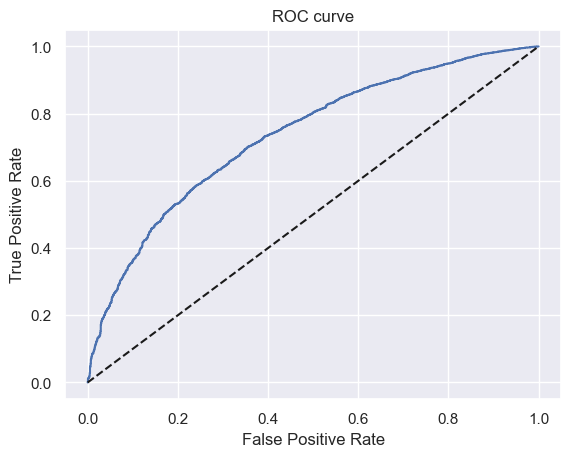

In [62]:
#let the fpr be the x axis
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, linestyle='--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [63]:
AUROC =roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7347984117552478

## Gini and Kolmogorov-Smirnov

In [64]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [65]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
409925,0,0.797510,0
388023,1,0.806612,1
40444,1,0.809843,1
289850,0,0.812869,1
296627,1,0.813284,1


In [66]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
19253,1,0.999102,1
192618,1,0.999128,1
97911,1,0.999237,1
6365,1,0.999239,1
140164,1,0.999374,1


In [67]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
#resets the index of a dataframe. Optionally, we can save the old indexes as a new column

In [68]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,409925,0,0.797510,0
1,388023,1,0.806612,1
2,40444,1,0.809843,1
3,289850,0,0.812869,1
4,296627,1,0.813284,1


In [69]:
#We need:
#(1) the cumulative % of total population
#(2) the cumulative % of good borrowers
#(3) the cumulative % of bad borrowers

In [70]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [71]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,409925,0,0.797510,0,1,0,1
1,388023,1,0.806612,1,2,1,1
2,40444,1,0.809843,1,3,2,1
3,289850,0,0.812869,1,4,2,2
4,296627,1,0.813284,1,5,3,2


In [72]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [73]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,409925,0,0.797510,0,1,0,1,0.000012,0.000000,0.000646
1,388023,1,0.806612,1,2,1,1,0.000024,0.000012,0.000646
2,40444,1,0.809843,1,3,2,1,0.000036,0.000024,0.000646
3,289850,0,0.812869,1,4,2,2,0.000047,0.000024,0.001291
4,296627,1,0.813284,1,5,3,2,0.000059,0.000036,0.001291


In [74]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
84214,19253,1,0.999102,1,84215,82666,1549,0.999953,0.999952,1.0
84215,192618,1,0.999128,1,84216,82667,1549,0.999964,0.999964,1.0
84216,97911,1,0.999237,1,84217,82668,1549,0.999976,0.999976,1.0
84217,6365,1,0.999239,1,84218,82669,1549,0.999988,0.999988,1.0
84218,140164,1,0.999374,1,84219,82670,1549,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

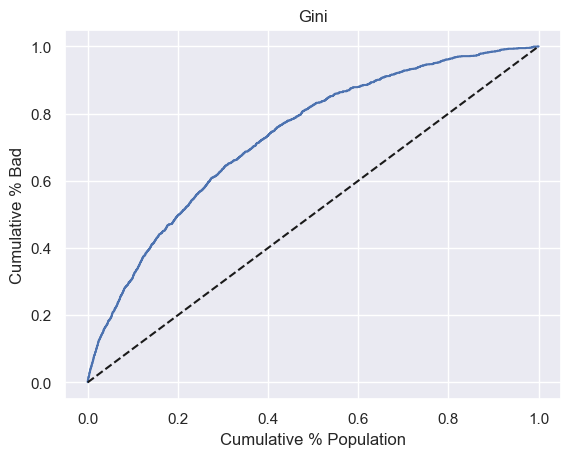

In [75]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [76]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.4695968235104957

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

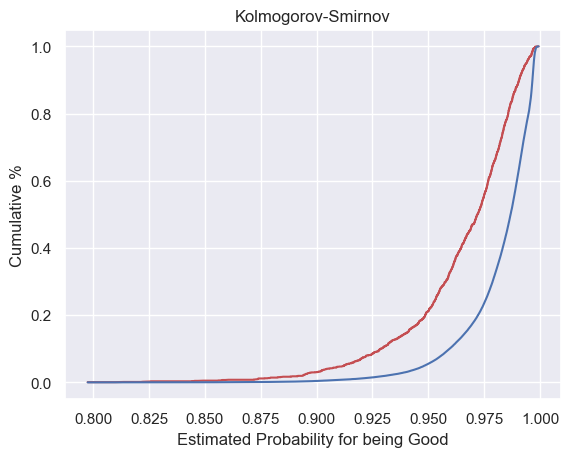

In [77]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [78]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.3461261076516392

In [79]:
#ln((1-PD)/PD)=2.501017
#(1-PD)/PD=exp(2.501017)
#1-PD=exp(2.501017)/(exp(2.501017)+1)
#The probability that person will not default (1-PD)


# Saving the model

In [81]:
import pickle
pickle.dump( reg2, open('pd_model.sav', 'wb'))